### 로지스틱 회귀 - 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- Sigmoid 함수

In [12]:
def sigmoid(x, a = 1, b = 0):
  return (1. / (1 + np.exp(-a * (x - b))))

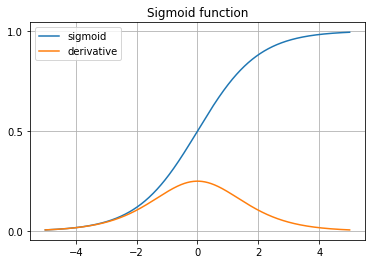

<Figure size 504x504 with 0 Axes>

In [14]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label = "sigmoid")
plt.plot(xs, ys*(1-ys), label = "derivative")
plt.title("Sigmoid function")
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.figure(figsize = (7,7))
plt.show()

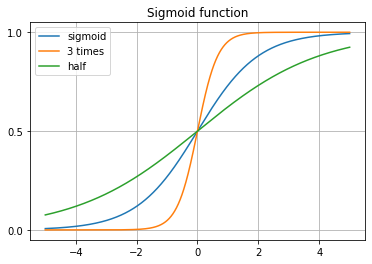

<Figure size 504x504 with 0 Axes>

In [15]:
y3 = sigmoid(xs, a = 3)
y_half = sigmoid(xs, a = 0.5)
plt.plot(xs, ys, label = "sigmoid")
plt.plot(xs, y3, label = "3 times")
plt.plot(xs, y_half, label = "half")
plt.title("Sigmoid function")
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.figure(figsize = (7,7))
plt.show()

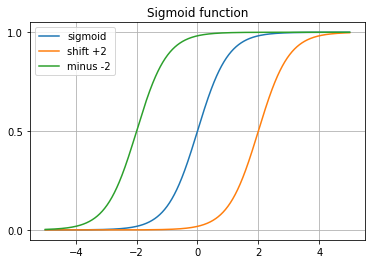

<Figure size 504x504 with 0 Axes>

In [16]:
ys = sigmoid(xs, a = 2)
y_plus2 = sigmoid(xs, a = 2, b = 2)
y_minus2 = sigmoid(xs, a = 2, b = -2)
plt.plot(xs, ys, label = "sigmoid")
plt.plot(xs, y_plus2, label = "shift +2")
plt.plot(xs, y_minus2, label = "minus -2")
plt.title("Sigmoid function")
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.figure(figsize = (7,7))
plt.show()

- 이진분류

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [20]:
# 로지스틱 회귀를 사용하려면 정규화/표준화 해야함
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target,
    stratify = cancer.target, random_state = 1018
)

((426, 30), (426,))

In [23]:
# Logistic 회귀
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state = 1018)
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)

0.993006993006993

In [24]:
lrc.coef_

array([[-0.31731598, -0.26962422, -0.29537395, -0.38173969, -0.11132269,
         0.57289737, -0.7464341 , -0.76804602,  0.00127956,  0.16214032,
        -1.14912014,  0.1855727 , -0.63083471, -0.92457767, -0.22274113,
         0.69392492, -0.15026908, -0.35468063,  0.22288625,  0.79845944,
        -0.91785095, -1.27187911, -0.74028284, -0.90780091, -0.4659485 ,
         0.1368427 , -0.96729168, -0.90344662, -0.64174869, -0.5546703 ]])

In [28]:
lrc.intercept_

array([0.27417284])

In [29]:
X_test[0]

array([-0.76890929,  0.25373211, -0.59268717, -0.76446379,  3.28355348,
        3.40290899,  1.91589718,  1.45170736,  2.86738293,  4.91091929,
        0.32637344, -0.11040904,  0.2865934 , -0.28837815,  0.68970166,
        2.74428041,  0.81951838,  1.11500701,  4.73268037,  2.04751088,
       -0.28146446,  0.13398409, -0.2499393 , -0.55002123,  3.3942747 ,
        3.89339743,  1.98958826,  2.17578601,  6.04604135,  4.93501034])

In [32]:
# X_test[0] 가 1 이 될 확률
val = np.dot(lrc.coef_ , X_test[0]) + lrc.intercept_
val

array([-6.41650199])

In [34]:
# X_test[0] 가 1 이 될 확률
sigmoid(val)

array([0.0016317])

In [35]:
lrc.predict_proba(X_test[:5])

array([[9.98368304e-01, 1.63169648e-03],
       [5.09166675e-04, 9.99490833e-01],
       [3.21759903e-04, 9.99678240e-01],
       [5.12100889e-04, 9.99487899e-01],
       [7.19039487e-01, 2.80960513e-01]])

- 다중 분류

In [39]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify = wine.target, random_state = 1018
)


In [40]:
lrc2 = LogisticRegression(random_state = 1018)
lrc2.fit(X_train, y_train)

LogisticRegression(random_state=1018)

In [42]:
lrc2.predict_proba(X_test[:5])

array([[1.63624760e-02, 7.17593299e-01, 2.66044225e-01],
       [6.11532340e-03, 7.13485977e-02, 9.22536079e-01],
       [9.98501038e-01, 1.20084029e-03, 2.98122130e-04],
       [4.49766506e-03, 8.19087558e-01, 1.76414776e-01],
       [3.64442685e-03, 3.89027143e-02, 9.57452859e-01]])

In [44]:
lrc2.predict(X_test[:5])

array([1, 2, 0, 1, 2])

In [45]:
lrc2.coef_

array([[ 0.80741312,  0.21420541,  0.49334995, -0.83149557,  0.01726111,
         0.18017785,  0.63626249, -0.17580988,  0.11363446,  0.19140022,
         0.10479276,  0.67381268,  1.03862016],
       [-0.91318839, -0.41678682, -0.80731316,  0.5895809 , -0.14531193,
        -0.0100943 ,  0.33767261,  0.23935927,  0.19663817, -1.02185418,
         0.59514672,  0.1085766 , -1.01396964],
       [ 0.10577526,  0.20258141,  0.31396321,  0.24191467,  0.12805082,
        -0.17008354, -0.9739351 , -0.06354939, -0.31027263,  0.83045396,
        -0.69993948, -0.78238928, -0.02465051]])

In [47]:
lrc2.intercept_

array([ 0.33431641,  0.59243719, -0.9267536 ])

In [57]:
val2 = np.dot(lrc2.coef_, X_test[0]) + lrc2.intercept_
val2

array([-2.1898614 ,  1.59105091,  0.59881049])

In [58]:
# 다중분류에서는 sigmoid 함수를 적용하지 않음
sigmoid(val2)

array([0.10066464, 0.83076391, 0.64538412])

In [59]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

In [63]:
# 다중 분류에서는 소프트맥스 함수 적용
softmax(val2)

array([0.01636248, 0.7175933 , 0.26604423])

In [64]:
np.sum(softmax(val2))

1.0